In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from bs4 import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Loading IMDB Movie dataset
data=pd.read_csv("amazon_reviews.csv")
data.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,US,50423057,R135Q3VZ4DQN5N,B00JWXFDMG,657335467,Everbling Purple and Clear Briolette Drop Swar...,Jewelry,5,0,0,N,Y,Beauties!,so beautiful even tho clearly not high end ......,2015-08-31
1,1,US,11262325,R2N0QQ6R4T7YRY,B00W5T1H9W,26030170,925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,5,0,0,N,N,Great product.,"Great product.. I got this set for my mother, ...",2015-08-31
2,2,US,27541121,R3N5JE5Y4T6W5M,B00M2L6KFY,697845240,"Sterling Silver Circle ""Friends Forever"" Infin...",Jewelry,5,0,0,N,Y,Exactly as pictured and my daughter's friend l...,Exactly as pictured and my daughter's friend l...,2015-08-31
3,3,US,5350721,R2I150CX5IVY9Q,B0006SW2WU,569859289,Surgical Stainless Steel Domed 9mm Fishbone Ri...,Jewelry,5,0,0,N,Y,Five Stars,Love it. Fits great. Super comfortable and nea...,2015-08-31
4,4,US,24484424,R1RM9ICOOA9MQ3,B009YPDW70,332947422,"Sterling Silver Family Pendant Necklace, 18""",Jewelry,5,0,0,N,Y,... a Mother's Day gift for my Mom and she lov...,Got this as a Mother's Day gift for my Mom and...,2015-08-31


In [ ]:
data = data[['review_body','star_rating']]

In [ ]:
# Data cleaning
data =  data.dropna()
data = data.reset_index(drop=True)
data.head()

,review_body,star_rating
0,so beautiful even tho clearly not high end ......,5
1,"Great product.. I got this set for my mother, ...",5
2,Exactly as pictured and my daughter's friend l...,5
3,Love it. Fits great. Super comfortable and nea...,5
4,Got this as a Mother's Day gift for my Mom and...,5


In [ ]:
# Data Manipulation
data['star_rating'] = data['star_rating'].astype(int) #convert the star_rating column to int
data = data[data['star_rating']!=3]
data['label'] = np.where(data['star_rating']>=4,1,0) #1-Positve,0-Negative

In [ ]:
data['label'].value_counts()

1    76596
0    14846
Name: label, dtype: int64

# Text Pre Processing

In [ ]:
# Preprocessing steps
import string
def preprocess(text):
    text = text.lower() # Lowercasing
    text=text.strip()
    text=re.compile('<.*?>').sub('', text) # Removing unnecessary characters
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  # Removing punctuations
    text = re.sub('\s+', ' ', text)  # Removing spaces
    text = re.sub(r'\[[0-9]*\]',' ',text) # Removing numbers
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) # Removing digits
    text = re.sub(r'\s+',' ',text)
    return text

In [ ]:
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stop]
    return ' '.join(a)


In [ ]:
# Lemmatization
wl = WordNetLemmatizer()

In [ ]:
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# Tokenizing the sentence
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
data['pre_processed'] = data['review_body'].apply(lambda x: finalpreprocess(x))
data.head()

,review_body,star_rating,label,pre_processed
0,so beautiful even tho clearly not high end ......,5,1,beautiful even tho clearly high end super grea...
1,"Great product.. I got this set for my mother, ...",5,1,great product get set mother allergic bijou pr...
2,Exactly as pictured and my daughter's friend l...,5,1,exactly picture daughter friend love come pack...
3,Love it. Fits great. Super comfortable and nea...,5,1,love fit great super comfortable neat idea fis...
4,Got this as a Mother's Day gift for my Mom and...,5,1,get mother day gift mom love really nice quali...


# Descriptive Statistics

In [ ]:
# Creating descriptive dataframe
descriptive_df = data[['pre_processed']]
descriptive_df

,pre_processed
0,beautiful even tho clearly high end super grea...
1,great product get set mother allergic bijou pr...
2,exactly picture daughter friend love come pack...
3,love fit great super comfortable neat idea fis...
4,get mother day gift mom love really nice quali...
...,...
99946,delivery quick bead loose u careful opening put
99947,tiny cute th inch wide back sit securely notch...
99948,beautiful stun cheapo piece afraid link stone ...
99949,inlay almost holographic comfortable super wid...


In [ ]:
text = ' '.join(review for review in data['pre_processed'])
print('Thre are {} words from all reviews.'.format(len(text)))

Thre are 6632542 words from all reviews.


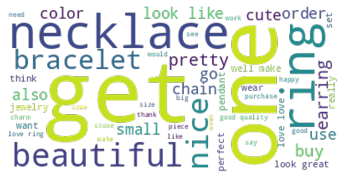

In [ ]:
# WordCloud
stopwords = set(stop)
wordcloud= WordCloud(mode = 'RGBA', max_font_size=100, stopwords=stopwords, max_words = 50,
                     background_color= None).generate(text)
plt.imshow(wordcloud, interpolation = 'mitchell')
plt.axis('off')
plt.show()

In [ ]:
# Word Count
descriptive_df['word_count'] = descriptive_df['pre_processed'].apply(lambda x: len(str(x).split(" ")))
descriptive_df[['pre_processed','word_count']].head()

<ipython-input-16-7a49e2722360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_df['word_count'] = descriptive_df['pre_processed'].apply(lambda x: len(str(x).split(" ")))


,pre_processed,word_count
0,beautiful even tho clearly high end super grea...,20
1,great product get set mother allergic bijou pr...,34
2,exactly picture daughter friend love come pack...,14
3,love fit great super comfortable neat idea fis...,11
4,get mother day gift mom love really nice quali...,11


In [ ]:
# Number of stopwords
descriptive_df['stopwords'] = descriptive_df['pre_processed'].apply(lambda x: len([x for x in x.split() if x in stop]))
descriptive_df[['pre_processed','stopwords']].head()

<ipython-input-18-ff5733e075e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_df['stopwords'] = descriptive_df['pre_processed'].apply(lambda x: len([x for x in x.split() if x in stop]))


,pre_processed,stopwords
0,beautiful even tho clearly high end super grea...,0
1,great product get set mother allergic bijou pr...,0
2,exactly picture daughter friend love come pack...,0
3,love fit great super comfortable neat idea fis...,0
4,get mother day gift mom love really nice quali...,0


# Word Embedding

In [ ]:
# Extracting text data - reviews
documents = data['pre_processed']
documents

0        beautiful even tho clearly high end super grea...
1        great product get set mother allergic bijou pr...
2        exactly picture daughter friend love come pack...
3        love fit great super comfortable neat idea fis...
4        get mother day gift mom love really nice quali...
                               ...                        
99946      delivery quick bead loose u careful opening put
99947    tiny cute th inch wide back sit securely notch...
99948    beautiful stun cheapo piece afraid link stone ...
99949    inlay almost holographic comfortable super wid...
99950                  even waste money back fit bent junk
Name: pre_processed, Length: 91442, dtype: object

In [ ]:
X_train,X_test,Y_train, Y_test = train_test_split(data['pre_processed'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (68581,) (68581,) Test:  ((22861,), (22861,))


In [ ]:
# Word Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

# Classification

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(X_train_vectors_tfidf, Y_train)

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(Y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(Y_test, y_predict))

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3737
           1       0.96      0.97      0.97     19124

    accuracy                           0.94     22861
   macro avg       0.91      0.88      0.89     22861
weighted avg       0.94      0.94      0.94     22861

Confusion Matrix: [[ 2936   801]
 [  494 18630]]
AUC: 0.9708335126717194


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf = MultinomialNB()

nb_tfidf.fit(X_train_vectors_tfidf, Y_train)

#Predict y value for test dataset

y_predict = nb_tfidf.predict(X_test_vectors_tfidf)

y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]

print(classification_report(Y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(Y_test, y_predict))

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.97      0.36      0.52      3737
           1       0.89      1.00      0.94     19124

    accuracy                           0.89     22861
   macro avg       0.93      0.68      0.73     22861
weighted avg       0.90      0.89      0.87     22861

Confusion Matrix: [[ 1338  2399]
 [   45 19079]]
AUC: 0.96247618530826


In [ ]:
# Predicting on test data

#converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(X_test)

#use the best model to predict 'target' value for the new dataset
y_predict = lr_tfidf.predict(X_vector)

y_prob = lr_tfidf.predict_proba(X_vector)[:,1]

classification_df = data[['pre_processed','label']].reset_index(drop=True)
print(classification_df.head(10))

                                       pre_processed  label
0  beautiful even tho clearly high end super grea...      1
1  great product get set mother allergic bijou pr...      1
2  exactly picture daughter friend love come pack...      1
3  love fit great super comfortable neat idea fis...      1
4  get mother day gift mom love really nice quali...      1
5                              love make get another      1
6                                   true size unique      1
7           necklace beautiful great accent wardrobe      1
8                                            perfect      1
9                                               love      1


# KMeans

In [ ]:
# Vectorization for K-Means
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(documents)

In [ ]:
# Clustering model
true_k = 2
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init=1)
model.fit(x)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:
# Printing top 5 items from each cluster
print('Top terms per cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
  print("Cluster %d: " % i),
  for ind in order_centroids[i,:5]: # To get top 5 items per cluster.
    print('% s' % terms[ind]),

print('\n')
print('Prediction')

Top terms per cluster:
Cluster 0: 
nice
beautiful
love
great
look
Cluster 1: 
love
wife
beautiful
ring
daughter


Prediction


In [ ]:
def tag_cluster(doc):
  vec = vectorizer.transform([doc])
  return model.predict(vec)[0]

In [ ]:
clusters = [tag_cluster(doc) for doc in documents]

In [ ]:
# Assigning clusters to each item
data['clusters'] = [tag_cluster(doc) for doc in data.pre_processed]
data.head()

,review_body,star_rating,label,pre_processed,clusters
0,so beautiful even tho clearly not high end ......,5,1,beautiful even tho clearly high end super grea...,0
1,"Great product.. I got this set for my mother, ...",5,1,great product get set mother allergic bijou pr...,0
2,Exactly as pictured and my daughter's friend l...,5,1,exactly picture daughter friend love come pack...,0
3,Love it. Fits great. Super comfortable and nea...,5,1,love fit great super comfortable neat idea fis...,0
4,Got this as a Mother's Day gift for my Mom and...,5,1,get mother day gift mom love really nice quali...,0


In [ ]:
data['clusters'].value_counts()

0    86511
1     4931
Name: clusters, dtype: int64

#### Conclusions from clusters

*   There are more items with cluster number 0.
*   There are less items with cluster number 1.



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


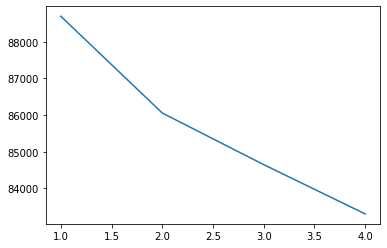

In [ ]:
wcss = []

for i in range(1,5):
  clustering = KMeans(n_clusters=i,init='k-means++',random_state=42)
  clustering.fit(x)
  wcss.append(clustering.inertia_)

ks = [1,2,3,4]
sns.lineplot(x = ks, y = wcss);
# Line breaks at 2, so the optimal value of k is 2.

In [ ]:
data

,review_body,star_rating,label,pre_processed,clusters
0,so beautiful even tho clearly not high end ......,5,1,beautiful even tho clearly high end super grea...,0
1,"Great product.. I got this set for my mother, ...",5,1,great product get set mother allergic bijou pr...,0
2,Exactly as pictured and my daughter's friend l...,5,1,exactly picture daughter friend love come pack...,0
3,Love it. Fits great. Super comfortable and nea...,5,1,love fit great super comfortable neat idea fis...,0
4,Got this as a Mother's Day gift for my Mom and...,5,1,get mother day gift mom love really nice quali...,0
...,...,...,...,...,...
99946,Delivery was quick. ...the beads are loose so ...,4,1,delivery quick bead loose u careful opening put,0
99947,Tiny but cute! About 1/8th of an inch wide. Th...,5,1,tiny cute th inch wide back sit securely notch...,0
99948,So beautiful and stunning. There are cheapo p...,5,1,beautiful stun cheapo piece afraid link stone ...,0
99949,The inlay is almost holographic. Very comforta...,5,1,inlay almost holographic comfortable super wid...,0


#LDA Topic Modeling

In [ ]:
print(len(documents))
print(documents[:5])

91442
0    beautiful even tho clearly high end super grea...
1    great product get set mother allergic bijou pr...
2    exactly picture daughter friend love come pack...
3    love fit great super comfortable neat idea fis...
4    get mother day gift mom love really nice quali...
Name: pre_processed, dtype: object


In [ ]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
# Preprocessing text for LDA
processed_docs = data['review_body'].map(preprocess)
processed_docs[:10]

0    [beautiful, clearly, high, super, great, price...
1    [great, product, mother, allergic, bijoux, pro...
2    [exactly, picture, daughter, friend, love, com...
3    [love, fit, great, super, comfortable, neat, i...
4    [mother, gift, love, nice, quality, interest, ...
5                                               [love]
6                                 [true, size, unique]
7       [necklace, beautiful, great, accent, wardrobe]
8                                            [perfect]
9                                               [love]
Name: review_body, dtype: object

In [ ]:
#Creating a vocabulary
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

#Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number)

0 appear
1 beautiful
2 clearly
3 costume
4 great
5 high
6 jewelry
7 look
8 near
9 nice
10 price


In [ ]:
#Keeping only the first 100000 most frequent tokens.
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[401]

[(51, 1), (161, 1)]

In [ ]:
bow_doc_401 = bow_corpus[401]

for i in range(len(bow_doc_401)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_401[i][0],
                                               dictionary[bow_doc_401[i][0]],
                                                     bow_doc_401[i][1]))

Word 51 ("quality") appears 1 time.
Word 161 ("good") appears 1 time.


In [ ]:
#Create tf-idf model object using models.TfidfModel on ‘bow_corpus’
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3136815166276146),
 (1, 0.1245025865307426),
 (2, 0.4032485258565098),
 (3, 0.32708298676039904),
 (4, 0.1238473895768183),
 (5, 0.2762750791547922),
 (6, 0.20155019630855675),
 (7, 0.105661037664547),
 (8, 0.4143391687224406),
 (9, 0.12714207904140204),
 (10, 0.15730708039422062),
 (11, 0.23904427908689344),
 (12, 0.25127214883304705),
 (13, 0.3744196759979113)]


In [ ]:
# Running LDA using Bag of Words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
# Explorin words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.051*"cute" + 0.032*"wear" + 0.029*"earrings" + 0.018*"necklace" + 0.016*"little" + 0.014*"ears" + 0.013*"long" + 0.012*"come" + 0.011*"super" + 0.011*"like"
Topic: 1 
Words: 0.053*"break" + 0.038*"wear" + 0.026*"cheap" + 0.024*"time" + 0.022*"money" + 0.019*"return" + 0.017*"fell" + 0.017*"look" + 0.017*"disappoint" + 0.017*"come"
Topic: 2 
Words: 0.041*"ship" + 0.037*"size" + 0.034*"fast" + 0.032*"order" + 0.030*"product" + 0.029*"arrive" + 0.027*"thank" + 0.026*"exactly" + 0.021*"come" + 0.020*"nice"
Topic: 3 
Words: 0.048*"ring" + 0.035*"purchase" + 0.031*"happy" + 0.028*"look" + 0.026*"compliment" + 0.021*"buy" + 0.020*"love" + 0.019*"awesome" + 0.018*"wear" + 0.018*"beautiful"
Topic: 4 
Words: 0.027*"bracelet" + 0.024*"silver" + 0.020*"color" + 0.020*"gold" + 0.018*"like" + 0.014*"review" + 0.014*"look" + 0.014*"jewelry" + 0.012*"charm" + 0.009*"receive"
Topic: 5 
Words: 0.161*"ring" + 0.049*"wear" + 0.030*"size" + 0.025*"pretty" + 0.022*"nice" + 0.020*"finger" 

In [ ]:
# Performance evaluation of LDA using Bag of Words
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6106776595115662	 
Topic: 0.069*"nice" + 0.048*"earrings" + 0.037*"little" + 0.027*"smaller" + 0.026*"love" + 0.025*"beautiful" + 0.024*"gorgeous" + 0.023*"small" + 0.023*"size" + 0.023*"think"

Score: 0.32777491211891174	 
Topic: 0.075*"look" + 0.064*"beautiful" + 0.057*"chain" + 0.051*"picture" + 0.047*"like" + 0.046*"necklace" + 0.024*"pendant" + 0.023*"piece" + 0.018*"expect" + 0.018*"nice"


In [ ]:
# Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [ ]:
# Explorin words occuring in that topic and its relative weight.
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.023*"compliment" + 0.019*"ring" + 0.018*"excellent" + 0.017*"wear" + 0.011*"love" + 0.009*"turn" + 0.009*"look" + 0.009*"everyday" + 0.009*"get" + 0.008*"receive"
Topic: 1 Word: 0.274*"love" + 0.067*"cute" + 0.049*"wife" + 0.046*"gift" + 0.020*"buy" + 0.019*"ring" + 0.016*"give" + 0.015*"sister" + 0.014*"birthday" + 0.013*"mother"
Topic: 2 Word: 0.086*"good" + 0.074*"pretty" + 0.035*"quality" + 0.031*"cheap" + 0.028*"look" + 0.019*"want" + 0.015*"love" + 0.015*"charm" + 0.015*"great" + 0.015*"gift"
Topic: 3 Word: 0.022*"bracelet" + 0.011*"look" + 0.010*"smaller" + 0.009*"amaze" + 0.009*"wear" + 0.009*"chain" + 0.008*"like" + 0.008*"love" + 0.008*"necklace" + 0.008*"elegant"
Topic: 4 Word: 0.064*"great" + 0.034*"small" + 0.029*"awesome" + 0.018*"price" + 0.018*"size" + 0.017*"look" + 0.015*"ring" + 0.012*"value" + 0.011*"right" + 0.009*"love"
Topic: 5 Word: 0.140*"nice" + 0.029*"daughter" + 0.026*"love" + 0.026*"earrings" + 0.023*"look" + 0.021*"price" + 0.017*"please" 

In [ ]:
# Performance evaluation of LDA using TF-IDF
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5177449584007263	 
Topic: 0.143*"beautiful" + 0.031*"love" + 0.029*"gorgeous" + 0.029*"lovely" + 0.028*"ring" + 0.028*"absolutely" + 0.020*"fit" + 0.019*"great" + 0.018*"product" + 0.018*"husband"

Score: 0.26506516337394714	 
Topic: 0.086*"good" + 0.074*"pretty" + 0.035*"quality" + 0.031*"cheap" + 0.028*"look" + 0.019*"want" + 0.015*"love" + 0.015*"charm" + 0.015*"great" + 0.015*"gift"

Score: 0.16332872211933136	 
Topic: 0.024*"like" + 0.011*"ring" + 0.010*"wear" + 0.009*"look" + 0.008*"star" + 0.008*"ears" + 0.007*"earrings" + 0.006*"love" + 0.006*"come" + 0.006*"little"


# Conclusions


*   Cluster 0 and Topic 0 has same words in comparison.
*   Cluster 1 and Topic 1 has same words in comparison.

